Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

# Import the necessary libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings 
warnings.filterwarnings("ignore")
import scipy.stats as st
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc,classification_report


# Load the dataset and check the first 10 rows of the dataset.

In [81]:
df=pd.read_excel(r"C:\Users\lavan\Downloads\Contraceptive_method_dataset.xlsx")

In [82]:
df.head(10)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
5,19.0,Tertiary,Tertiary,0.0,Scientology,No,3,High,Exposed,No
6,38.0,Primary,Secondary,6.0,Scientology,No,3,Low,Exposed,No
7,21.0,Secondary,Secondary,1.0,Scientology,Yes,3,Low,Exposed,No
8,27.0,Primary,Secondary,3.0,Scientology,No,3,Very High,Exposed,No
9,45.0,Uneducated,Uneducated,8.0,Scientology,No,2,Low,Not-Exposed,No


2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

# Check the basic measures of Descriptive Statistics of the dataframe.


In [83]:
df.shape

(1473, 10)

In [84]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [85]:
df.describe()


,Wife_age,No_of_children_born,Husband_Occupation
count,1402.000000,1452.000000,1473.000000
mean,32.606277,3.254132,2.137814
std,8.274927,2.365212,0.864857
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,4.000000,3.000000
max,49.000000,16.000000,4.000000


# Check the information about the various data types of the variables in the data frame. Also check for missing values.

In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [87]:
# Convert the "Husband's occupation" column to categorical
df["Husband_Occupation"] = df["Husband_Occupation"].astype('object')

# Verify the data type change
print(df.dtypes)

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation            object
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [89]:
# Assuming your DataFrame is named 'df'
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print("Numerical Variables:")
print(numerical_columns)

print("\nCategorical Variables:")
print(categorical_columns)


Numerical Variables:
Index(['Wife_age', 'No_of_children_born'], dtype='object')

Categorical Variables:
Index(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [90]:
import pandas as pd

# Assuming your DataFrame is named 'df'
missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)


Missing Values:
Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [91]:
# Replace null values in "Wife_age" with the median age
median_age = df['Wife_age'].median()
df['Wife_age'].fillna(median_age, inplace=True)

# Replace null values in "No_of_children_born" with the median
median_value = df['No_of_children_born'].median()
df['No_of_children_born'].fillna(median_value, inplace=True)

# Cross-check that the missing values have been replaced
missing_value_counts = df.isnull().sum()
print(missing_value_counts)


Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64


In [92]:
df.duplicated().sum()

85

In [93]:
df = df.drop_duplicates()


In [94]:
df.duplicated().sum()

0

In [95]:
import pandas as pd

# Assuming your DataFrame is named df

outlier_counts = {}  # Dictionary to store outlier counts

# Define a function to count outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Calculate outlier counts for each numerical column
for col in df.columns:
    if df[col].dtype == 'float64':  # Change the data type as needed
        outlier_counts[col] = count_outliers(df[col])

# Print the outlier counts
print(outlier_counts)


{'Wife_age': 0, 'No_of_children_born': 7}


In [96]:
Mapping={1:'one',2:'two',3:'three',4:'four'}
df['Husband_Occupation']=df['Husband_Occupation'].replace(Mapping)

In [97]:
# Separate numeric and categorical data
numeric_df = df.select_dtypes(include=['int', 'float'])
categorical_df = df.select_dtypes(include=['object'])



In [98]:
numeric_df.shape

(1388, 2)

In [99]:
categorical_df.shape

(1388, 8)

In [100]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

In [101]:
outlier_counts = {}

In [102]:
for column in numeric_df.columns:
    outlier_counts[column] = count_outliers(numeric_df[column])

In [103]:
outlier_counts

{'Wife_age': 0, 'No_of_children_born': 7}

In [104]:
# Define a function to replace outliers in a column with bounds
def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

In [105]:
numeric_df = numeric_df.apply(replace_outliers_with_bounds)

In [106]:
outlier_counts_clean={}

In [107]:
for column in numeric_df.columns:
    outlier_counts_clean[column] = count_outliers(numeric_df[column])

In [108]:
outlier_counts_clean

{'Wife_age': 0, 'No_of_children_born': 0}

# Univariate Analysis

In [109]:
numeric_df

,Wife_age,No_of_children_born
0,24.0,3.0
1,45.0,10.0
2,43.0,7.0
3,42.0,9.0
4,36.0,8.0
...,...,...
1466,42.0,3.0
1468,33.0,3.0
1470,39.0,3.0
1471,33.0,3.0


In [110]:
# Define a function to replace outliers in a column with bounds
def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

In [111]:
numeric_df_cleaned = numeric_df.apply(replace_outliers_with_bounds)

In [112]:
outlier_counts_clean={}

In [113]:
for column in numeric_df_cleaned.columns:
    outlier_counts_clean[column] = count_outliers(numeric_df_cleaned[column])

In [114]:
outlier_counts_clean

{'Wife_age': 0, 'No_of_children_born': 0}

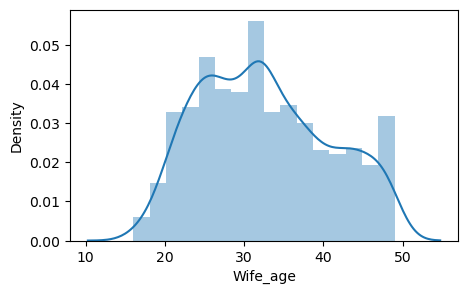

In [115]:
plt.figure(figsize=(5, 3))  # Adjust the size as needed
sns.distplot(numeric_df['Wife_age'], kde=True)
plt.show()


In [116]:
from scipy.stats import skew

skewness = skew(numeric_df['Wife_age'])
print("Skewness of Wife's Age:", skewness)


Skewness of Wife's Age: 0.27399531733641797


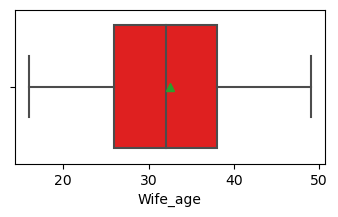

In [124]:
plt.figure(figsize=(4, 2))  # Adjust the size as needed
sns.boxplot(x=numeric_df['Wife_age'], showmeans=True, color='red', orient='h')
plt.show()


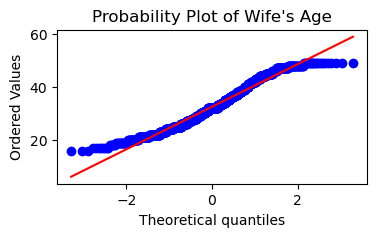

In [125]:
plt.figure(figsize=(4, 2))
st.probplot(numeric_df['Wife_age'], dist='norm', plot=plt)
plt.title("Probability Plot of Wife's Age")
plt.show()


In [126]:
statistic,pvalue=shapiro(numeric_df['Wife_age'])
print(f'P-Value of Wife Age ',pvalue)
if pvalue<=0.05:
    print('Data is not Normal distributed')

else:
    print('Data is Normal Distributed')


P-Value of Wife Age  8.042058364754898e-17
Data is not Normal distributed


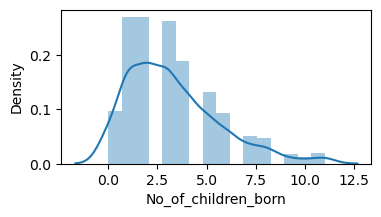

In [127]:
plt.figure(figsize=(4, 2))
sns.distplot(numeric_df['No_of_children_born'],kde=True)
plt.show()

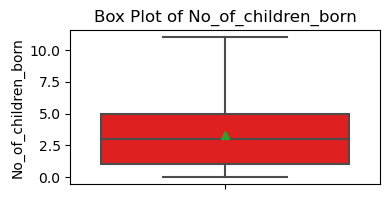

In [128]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=numeric_df, y='No_of_children_born', showmeans=True, color='red', orient='v')
plt.title("Box Plot of No_of_children_born")
plt.show()


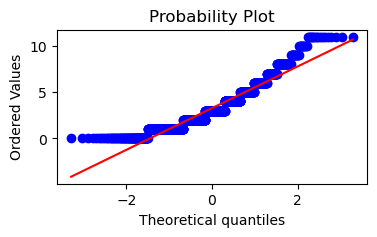

In [129]:
plt.figure(figsize=(4, 2))
st.probplot(numeric_df['No_of_children_born'], dist='norm', plot=plt)
plt.show()

In [130]:
from scipy.stats import skew

skewness_no_of_children = skew(numeric_df['No_of_children_born'])
print("Skewness of No_of_children_born:", skewness_no_of_children)


Skewness of No_of_children_born: 0.9761541212618456


In [131]:
statistic,pvalue=shapiro(numeric_df['No_of_children_born'])
print(f'P-Value of No_of_children_born ',pvalue)
if pvalue<=0.05:
    print('Data is not Normal distributed')

else:
    print('Data is Normal Distributed')

P-Value of No_of_children_born  5.9534126884884575e-27
Data is not Normal distributed


In [133]:
# Assuming your DataFrame is named df
categorical_df = df[['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
                    'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
                    'Contraceptive_method_used']]

# Calculate the frequency count for each categorical variable
for column in categorical_df.columns:
    frequency_counts = df[column].value_counts()
    print(f"Frequency counts for {column}:\n{frequency_counts}\n")


Frequency counts for Wife_ education:
Tertiary      510
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64

Frequency counts for Husband_education:
Tertiary      822
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64

Frequency counts for Wife_religion:
Scientology        1182
Non-Scientology     206
Name: Wife_religion, dtype: int64

Frequency counts for Wife_Working:
No     1040
Yes     348
Name: Wife_Working, dtype: int64

Frequency counts for Husband_Occupation:
three    570
two      414
one      377
four      27
Name: Husband_Occupation, dtype: int64

Frequency counts for Standard_of_living_index:
Very High    613
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

Frequency counts for Media_exposure :
Exposed        1279
Not-Exposed     109
Name: Media_exposure , dtype: int64

Frequency counts for Contraceptive_method_used:
Yes    774
No     614
Name: Contr

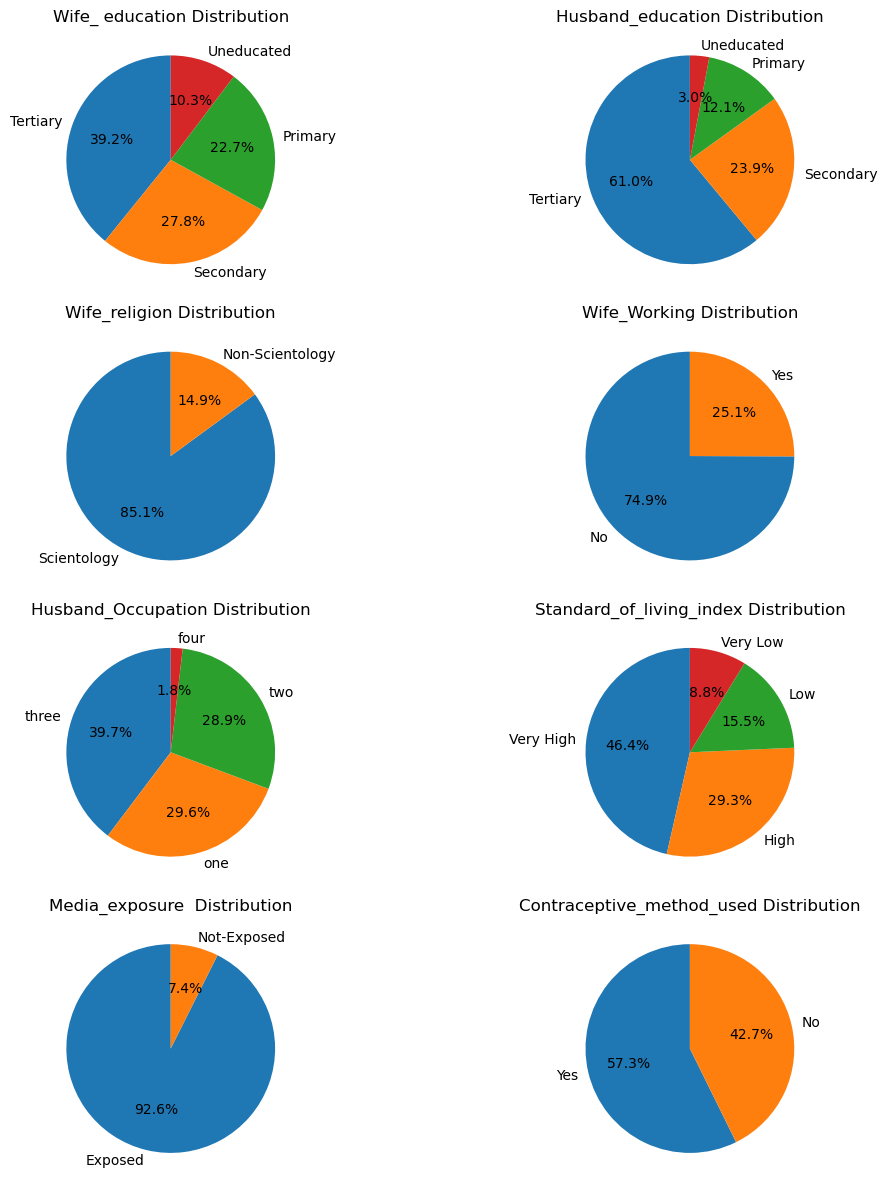

In [43]:
# Define the number of rows and columns for subplots
nrows, ncols = 4, 2

# Create a subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and create pie charts
for i, column in enumerate(categorical_df.columns):
    ax = axes[i]
    category_counts = categorical_df[column].value_counts()
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_aspect('equal')
    ax.set_title(f'{column} Distribution')

# Remove any unused subplots
for i in range(len(categorical_df.columns), nrows * ncols):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the pie charts
plt.show()

# Bivariate Analysis

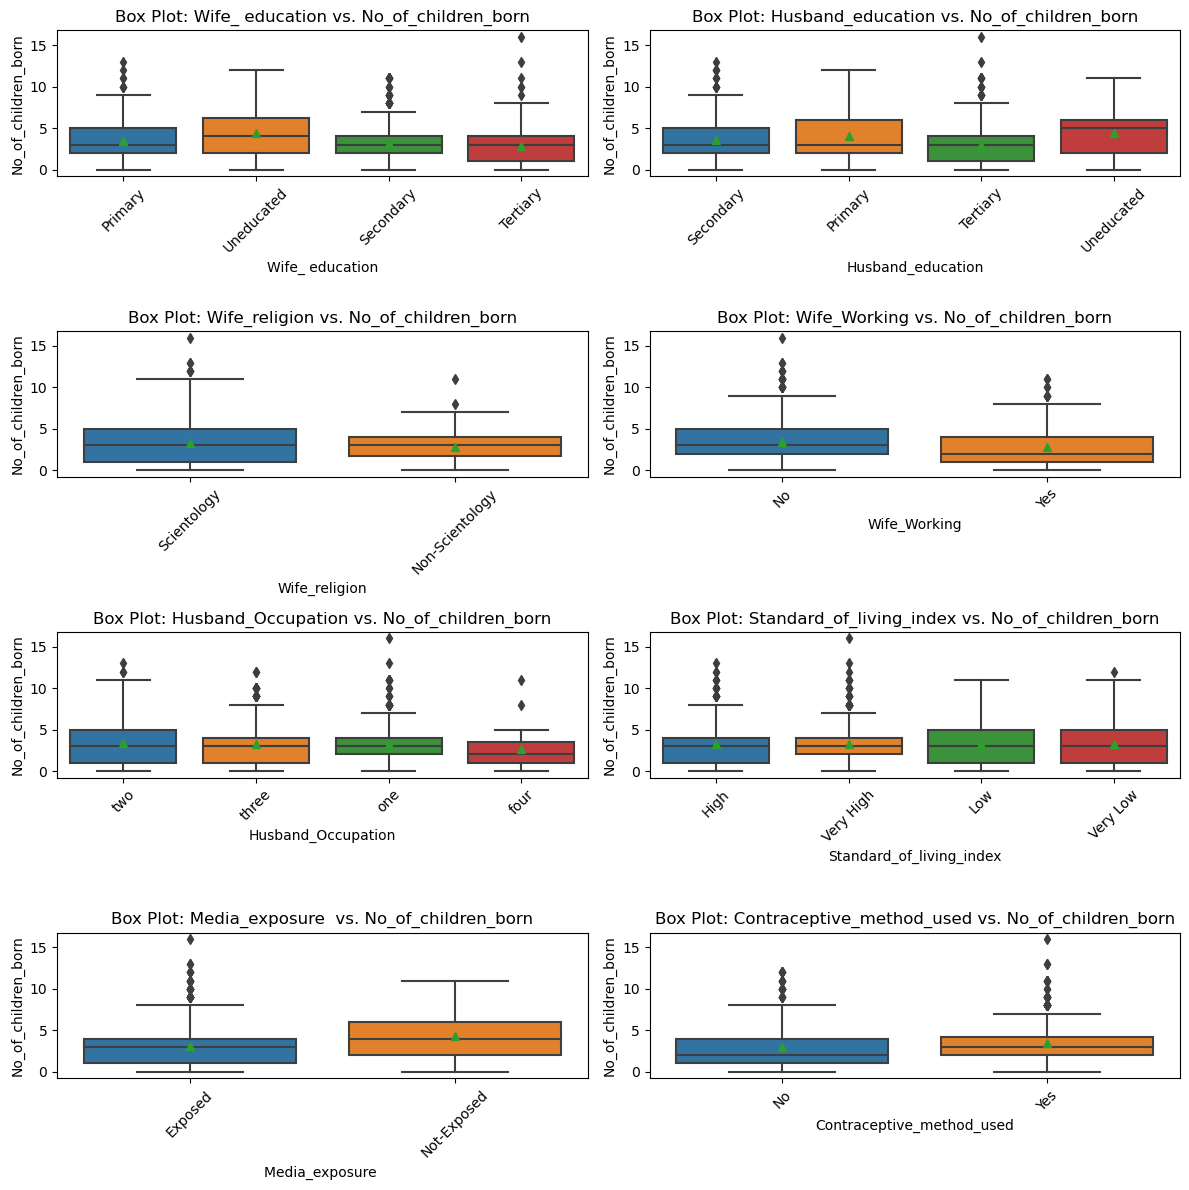

In [44]:
# Define the number of rows and columns for subplots
nrows, ncols = 4, 2

# Create a subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns
for i, categorical_column in enumerate(categorical_df.columns):
    ax = axes[i]

    # Create a swarm plot for each combination of one categorical and one numerical column
    sns.boxplot(x=categorical_column, y='No_of_children_born', data=df, ax=ax, showmeans=True)
    ax.set_title(f'Box Plot: {categorical_column} vs. No_of_children_born')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for readability

# Remove any unused subplots
for i in range(8, nrows * ncols):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the swarm plots
plt.show()

In [134]:
# Loop through the categorical columns
for categorical_column in categorical_df.columns:
    category_means = df.groupby(categorical_column)['No_of_children_born'].mean()
    print(f"Mean No_of_children_born by {categorical_column}:\n{category_means}\n")


Mean No_of_children_born by Wife_ education:
Wife_ education
Primary       3.512121
Secondary     3.241206
Tertiary      2.839216
Uneducated    4.440000
Name: No_of_children_born, dtype: float64

Mean No_of_children_born by Husband_education:
Husband_education
Primary       4.040000
Secondary     3.553314
Tertiary      2.952555
Uneducated    4.454545
Name: No_of_children_born, dtype: float64

Mean No_of_children_born by Wife_religion:
Wife_religion
Non-Scientology    2.825243
Scientology        3.368020
Name: No_of_children_born, dtype: float64

Mean No_of_children_born by Wife_Working:
Wife_Working
No     3.430769
Yes    2.859195
Name: No_of_children_born, dtype: float64

Mean No_of_children_born by Husband_Occupation:
Husband_Occupation
four     2.629630
one      3.307692
three    3.242105
two      3.374396
Name: No_of_children_born, dtype: float64

Mean No_of_children_born by Standard_of_living_index:
Standard_of_living_index
High         3.312649
Low          3.312775
Very High    

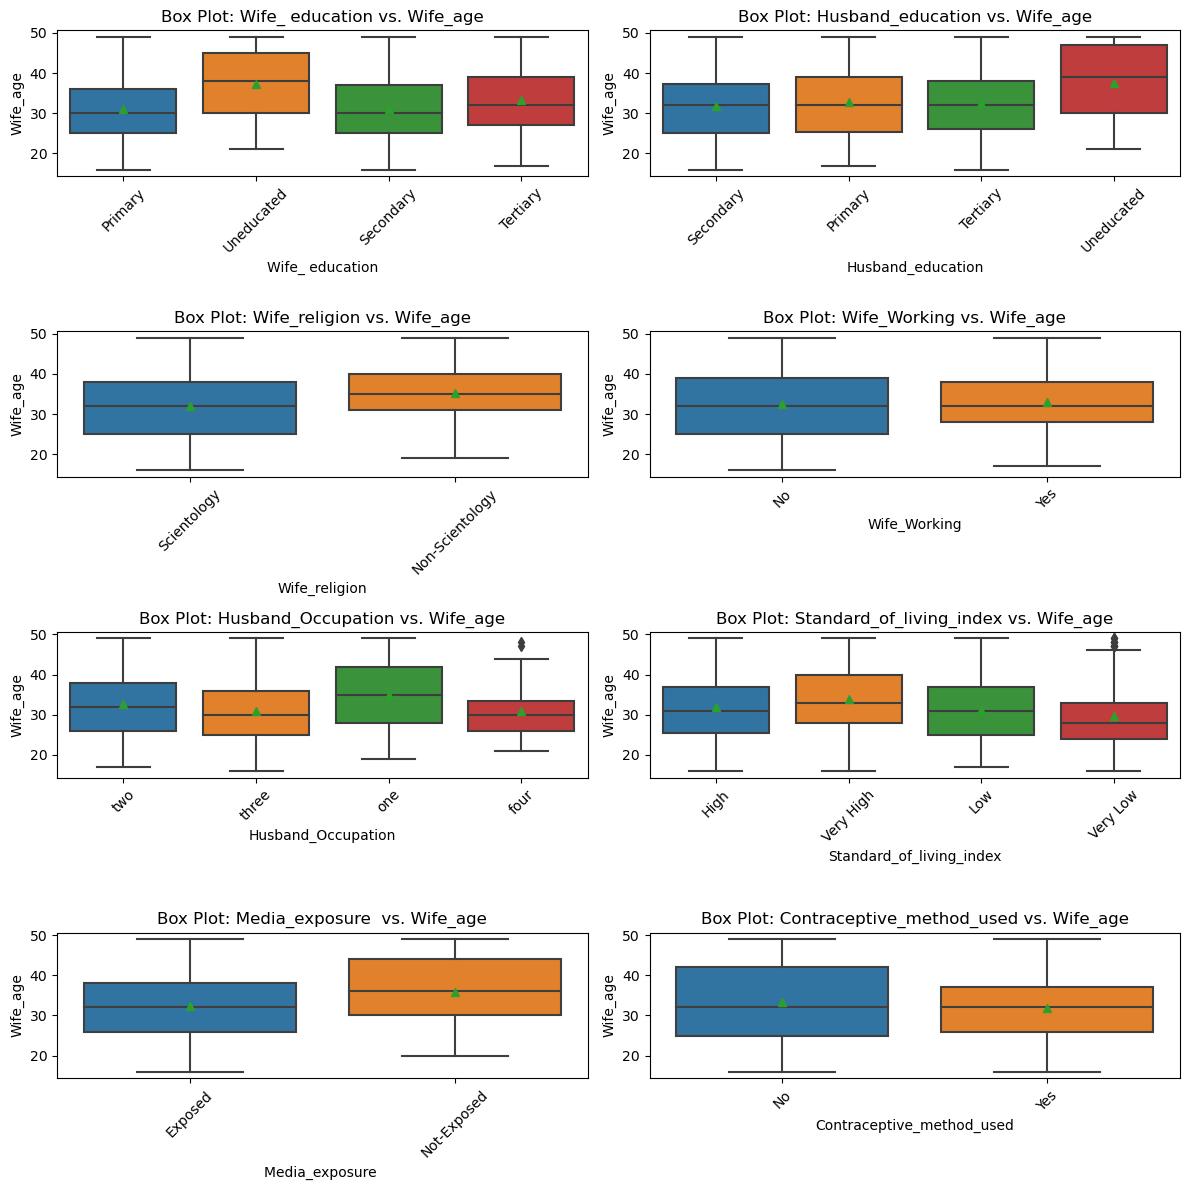

In [45]:
# Define the number of rows and columns for subplots
nrows, ncols = 4, 2

# Create a subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns
for i, categorical_column in enumerate(categorical_df.columns):
    ax = axes[i]

    # Create a swarm plot for each combination of one categorical and one numerical column
    sns.boxplot(x=categorical_column, y='Wife_age', data=df, ax=ax, showmeans=True)
    ax.set_title(f'Box Plot: {categorical_column} vs. Wife_age')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for readability

# Remove any unused subplots
for i in range(8, nrows * ncols):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the swarm plots
plt.show()

In [136]:
# Loop through the categorical columns
for categorical_column in categorical_df.columns:
    category_means = df.groupby(categorical_column)['Wife_age'].mean()
    print(f"Mean Wife_age by {categorical_column}:\n{category_means}\n")


Mean Wife_age by Wife_ education:
Wife_ education
Primary       31.100000
Secondary     31.208543
Tertiary      33.109804
Uneducated    37.246667
Name: Wife_age, dtype: float64

Mean Wife_age by Husband_education:
Husband_education
Primary       32.800000
Secondary     32.025937
Tertiary      32.424574
Uneducated    37.522727
Name: Wife_age, dtype: float64

Mean Wife_age by Wife_religion:
Wife_religion
Non-Scientology    35.140777
Scientology        32.079526
Name: Wife_age, dtype: float64

Mean Wife_age by Wife_Working:
Wife_Working
No     32.383654
Yes    32.982759
Name: Wife_age, dtype: float64

Mean Wife_age by Husband_Occupation:
Husband_Occupation
four     30.962963
one      34.883289
three    31.070175
two      32.512077
Name: Wife_age, dtype: float64

Mean Wife_age by Standard_of_living_index:
Standard_of_living_index
High         32.004773
Low          31.193833
Very High    33.975530
Very Low     29.759690
Name: Wife_age, dtype: float64

Mean Wife_age by Media_exposure :
Medi

# Multivariate Analysis

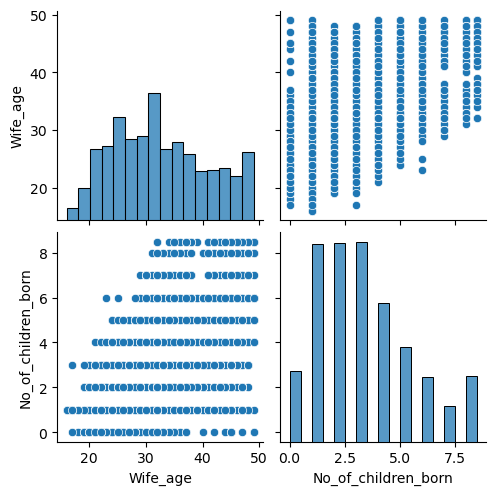

In [46]:
# Create a pairplot for numerical variables
sns.pairplot(numeric_df)
plt.show()

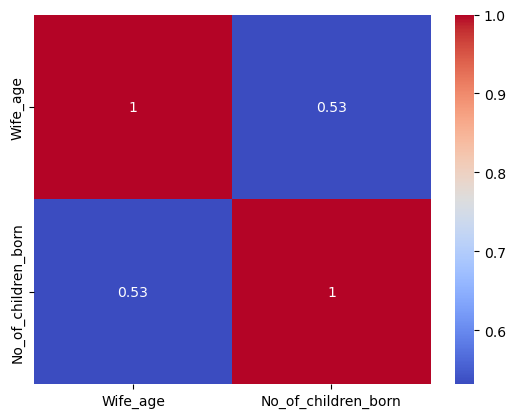

In [47]:
# Create a correlation heatmap for numerical variables
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [137]:
correlation_matrix = numeric_df.corr()
correlation_matrix


,Wife_age,No_of_children_born
Wife_age,1.000000,0.530196
No_of_children_born,0.530196,1.000000


In [48]:
# Initialize a list to store correlated columns
correlated_columns = []

# Loop through input columns and calculate chi-squared statistic
for input_column in categorical_df.columns[:-1]:  # Exclude the last column (output)
    contingency_table = pd.crosstab(categorical_df[input_column], categorical_df['Contraceptive_method_used'])
    chi2, p, _, _ = st.chi2_contingency(contingency_table)
    
    if p < 0.05:  # Adjust the significance level (alpha) as needed
        correlated_columns.append(input_column)
correlated_columns

['Wife_ education',
 'Husband_education',
 'Wife_religion',
 'Husband_Occupation',
 'Standard_of_living_index',
 'Media_exposure ']

In [49]:
# Separate the numerical variables by categories in the output column
groups = [df['Wife_age'] for category, num_col in df.groupby('Contraceptive_method_used')]

# Perform a one-way ANOVA
f_statistic, p_value = st.f_oneway(*groups)

# Print the results
print(f'F-statistic: {f_statistic:.3f}')
print(f'p-value: {p_value:.3f}')

if p_value < 0.05:  # Adjust the significance level (alpha) as needed
    print("The means of the numerical variables are significantly different.")
else:
    print("There is no significant difference in the means of the numerical variables.")

F-statistic: -0.000
p-value: nan
There is no significant difference in the means of the numerical variables.


In [50]:
# Separate the numerical variables by categories in the output column
groups = [df['No_of_children_born'] for category, num_col in df.groupby('Contraceptive_method_used')]

# Perform a one-way ANOVA
f_statistic, p_value = st.f_oneway(*groups)

# Print the results
print(f'F-statistic: {f_statistic:.3f}')
print(f'p-value: {p_value:.3f}')

if p_value < 0.05:  # Adjust the significance level (alpha) as needed
    print("The means of the numerical variables are significantly different.")
else:
    print("There is no significant difference in the means of the numerical variables.")

F-statistic: 0.000
p-value: 1.000
There is no significant difference in the means of the numerical variables.


2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [143]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_df.columns:
    categorical_df[column] = label_encoder.fit_transform(categorical_df[column])

categorical_df.head()

,Wife_ education,Husband_education,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,0,1,1,0,3,0,0,0
1,3,1,1,0,2,2,0,0
2,0,1,1,0,2,2,0,0
3,1,0,1,0,2,0,0,0
4,1,1,1,0,2,1,0,0


In [144]:
data=pd.concat([numeric_df,categorical_df],axis=1)

In [145]:
data.isnull().sum()

Wife_age                     0
No_of_children_born          0
Wife_ education              0
Husband_education            0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [146]:
X=data.iloc[:,:-1]

In [147]:
Y=data.iloc[:,-1]

In [148]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3, random_state=0)

Logistic Regression
Test accuracy: 0.6139088729016786
Test confusion matrix : [[ 71 104]
 [ 57 185]]
Test roc_auc_score 0.5850885478158205
Train accuracy: 0.6570545829042225
Train confusion matrix : [[224 215]
 [118 414]]
Train roc_auc_score 0.6442230290989432


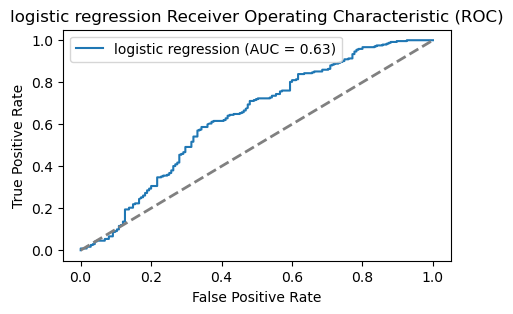

In [189]:
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
lg_pred=lg.predict(Xtest)
lg_pred1=lg.predict(Xtrain)
print("Logistic Regression")
print("Test accuracy:",accuracy_score(Ytest, lg_pred))
print("Test confusion matrix :",confusion_matrix(Ytest, lg_pred))
print("Test roc_auc_score",roc_auc_score(Ytest,lg_pred))

print("Train accuracy:",accuracy_score(Ytrain, lg_pred1))
print("Train confusion matrix :",confusion_matrix(Ytrain, lg_pred1))
print("Train roc_auc_score",roc_auc_score(Ytrain,lg_pred1))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, lg.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'logistic regression (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'logistic regression Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


Linear Discriminant Analysis
Test accuracy: 0.6235011990407674
Test confusion matrix : [[ 70 105]
 [ 52 190]]
Test roc_auc_score 0.5925619834710745
Train accuracy: 0.659114315139032
Train confusion matrix : [[220 219]
 [112 420]]
Train roc_auc_score 0.6453063181872677


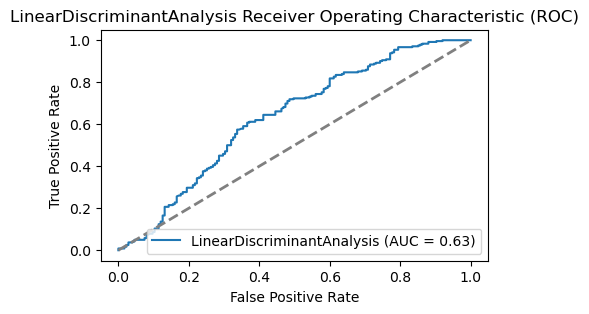

In [190]:
lg=LinearDiscriminantAnalysis()
lg.fit(Xtrain,Ytrain)
lg_pred=lg.predict(Xtest)
lg_pred1=lg.predict(Xtrain)
print('Linear Discriminant Analysis')
print("Test accuracy:",accuracy_score(Ytest, lg_pred))
print("Test confusion matrix :",confusion_matrix(Ytest, lg_pred))
print("Test roc_auc_score",roc_auc_score(Ytest,lg_pred))
print("Train accuracy:",accuracy_score(Ytrain, lg_pred1))
print("Train confusion matrix :",confusion_matrix(Ytrain, lg_pred1))
print("Train roc_auc_score",roc_auc_score(Ytrain,lg_pred1))


# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, lg.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'LinearDiscriminantAnalysis (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'LinearDiscriminantAnalysis Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


DecisionTree
Test accuracy: 0.6019184652278178
Test confusion matrix : [[105  70]
 [ 96 146]]
Test roc_auc_score 0.6016528925619834
Train accuracy: 0.9824922760041195
Train confusion matrix : [[439   0]
 [ 17 515]]
Train roc_auc_score 0.9840225563909775


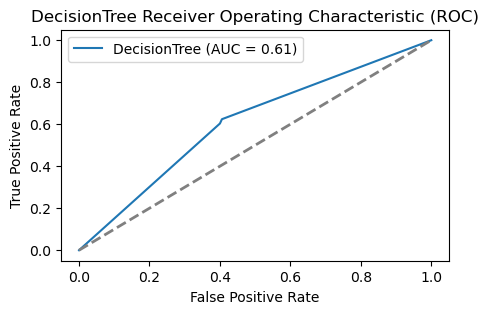

In [191]:
lg=DecisionTreeClassifier()
lg.fit(Xtrain,Ytrain)
lg_pred=lg.predict(Xtest)
lg_pred1=lg.predict(Xtrain)
print('DecisionTree')
print("Test accuracy:",accuracy_score(Ytest, lg_pred))
print("Test confusion matrix :",confusion_matrix(Ytest, lg_pred))
print("Test roc_auc_score",roc_auc_score(Ytest,lg_pred))
print("Train accuracy:",accuracy_score(Ytrain, lg_pred1))
print("Train confusion matrix :",confusion_matrix(Ytrain, lg_pred1))
print("Train roc_auc_score",roc_auc_score(Ytrain,lg_pred1))


# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, lg.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'DecisionTree (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'DecisionTree Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Update the model dictionary to include LDA
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_dist': {
            'C': np.logspace(-3, 3, 100),
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'param_dist': {
            'solver': ['svd', 'lsqr', 'eigen']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_dist': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    }
}

# Find and evaluate the best model
best_model = None
best_score = 0

for model_name, model_info in models.items():
    model = model_info['model']
    param_dist = model_info['param_dist']
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)
    random_search.fit(Xtrain, Ytrain)
    score = random_search.best_score_
    if score > best_score:
        best_model = random_search.best_estimator_
        best_score = score

print(f'Best Model: {type(best_model).__name__}')
print(f'Best Model Score: {best_score:.3f}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Model: DecisionTreeClassifier
Best Model Score: 0.676


In [176]:
# Evaluate the best model on the test data
best_model.fit(Xtrain, Ytrain)
test_predictions = best_model.predict(Xtest)
test_cm = confusion_matrix(Ytest, test_predictions)
test_accuracy = accuracy_score(Ytest, test_predictions)
roc_auc_test = roc_auc_score(Ytest, test_predictions)
test_fpr, test_tpr, _ = roc_curve(Ytest, test_predictions)

# Print the model name along with evaluation results
print(f"Model: {best_model.__class__.__name__}")
print("Confusion Matrix (Test Data):")
print(test_cm)
print("Test Accuracy:", test_accuracy)
print("ROC AUC (Test Data):", roc_auc_test)


Model: DecisionTreeClassifier
Confusion Matrix (Test Data):
[[ 96  79]
 [ 56 186]]
Test Accuracy: 0.6762589928057554
ROC AUC (Test Data): 0.6585832349468713


In [177]:
# Evaluate the best model on the training data
train_predictions = best_model.predict(Xtrain)
train_cm = confusion_matrix(Ytrain, train_predictions)
train_accuracy = accuracy_score(Ytrain, train_predictions)
roc_auc_train = roc_auc_score(Ytrain, train_predictions)

# Print the model name along with evaluation results
print(f"Model: {best_model.__class__.__name__}")
print("Confusion Matrix (Training Data):")
print(train_cm)
print("Training Accuracy:", train_accuracy)
print("ROC AUC (Training Data):", roc_auc_train)


Model: DecisionTreeClassifier
Confusion Matrix (Training Data):
[[294 145]
 [ 88 444]]
Training Accuracy: 0.7600411946446962
ROC AUC (Training Data): 0.7521451693013856


In [178]:
# Get classification reports
test_classification_report = classification_report(Ytest, test_predictions, target_names=["No Contraceptive", "Contraceptive"])
train_classification_report = classification_report(Ytrain, train_predictions, target_names=["No Contraceptive", "Contraceptive"])

# Print the model name along with classification reports
print(f"Classification Report for Test Data ({best_model.__class__.__name__}):")
print(test_classification_report)

print(f"Classification Report for Training Data ({best_model.__class__.__name__}):")
print(train_classification_report)


Classification Report for Test Data (DecisionTreeClassifier):
                  precision    recall  f1-score   support

No Contraceptive       0.63      0.55      0.59       175
   Contraceptive       0.70      0.77      0.73       242

        accuracy                           0.68       417
       macro avg       0.67      0.66      0.66       417
    weighted avg       0.67      0.68      0.67       417

Classification Report for Training Data (DecisionTreeClassifier):
                  precision    recall  f1-score   support

No Contraceptive       0.77      0.67      0.72       439
   Contraceptive       0.75      0.83      0.79       532

        accuracy                           0.76       971
       macro avg       0.76      0.75      0.75       971
    weighted avg       0.76      0.76      0.76       971



In [179]:
# Get feature importance (if best model is Decision Tree)
feature_importance = None
feature_names = None
if isinstance(best_model, DecisionTreeClassifier):
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    # Print the model name along with feature importance
    print(f"Feature Importance ({best_model.__class__.__name__}):")
    for name, importance in zip(feature_names, feature_importance):
        print(f"{name}: {importance:.3f}")


Feature Importance (DecisionTreeClassifier):
Wife_age: 0.290
No_of_children_born: 0.413
Wife_ education: 0.124
Husband_education: 0.053
Wife_religion: 0.021
Wife_Working: 0.000
Husband_Occupation: 0.036
Standard_of_living_index: 0.036
Media_exposure : 0.027


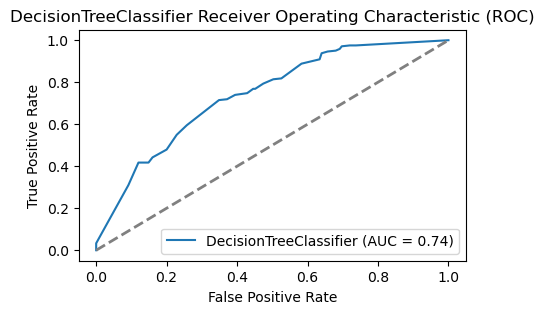

In [180]:
# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, best_model.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'{best_model.__class__.__name__} (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{best_model.__class__.__name__} Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


Best Model: DecisionTreeClassifier
Test Data:
Confusion Matrix:
 [[ 96  79]
 [ 56 186]]
Accuracy: 0.6762589928057554
ROC AUC Score: 0.66

Train Data:
Confusion Matrix:
 [[294 145]
 [ 88 444]]
Accuracy: 0.7600411946446962
ROC AUC Score: 0.75

Test Data Classification Report:
                   precision    recall  f1-score   support

No Contraceptive       0.63      0.55      0.59       175
   Contraceptive       0.70      0.77      0.73       242

        accuracy                           0.68       417
       macro avg       0.67      0.66      0.66       417
    weighted avg       0.67      0.68      0.67       417


Train Data Classification Report:
                   precision    recall  f1-score   support

No Contraceptive       0.77      0.67      0.72       439
   Contraceptive       0.75      0.83      0.79       532

        accuracy                           0.76       971
       macro avg       0.76      0.75      0.75       971
    weighted avg       0.76      0.76      0.

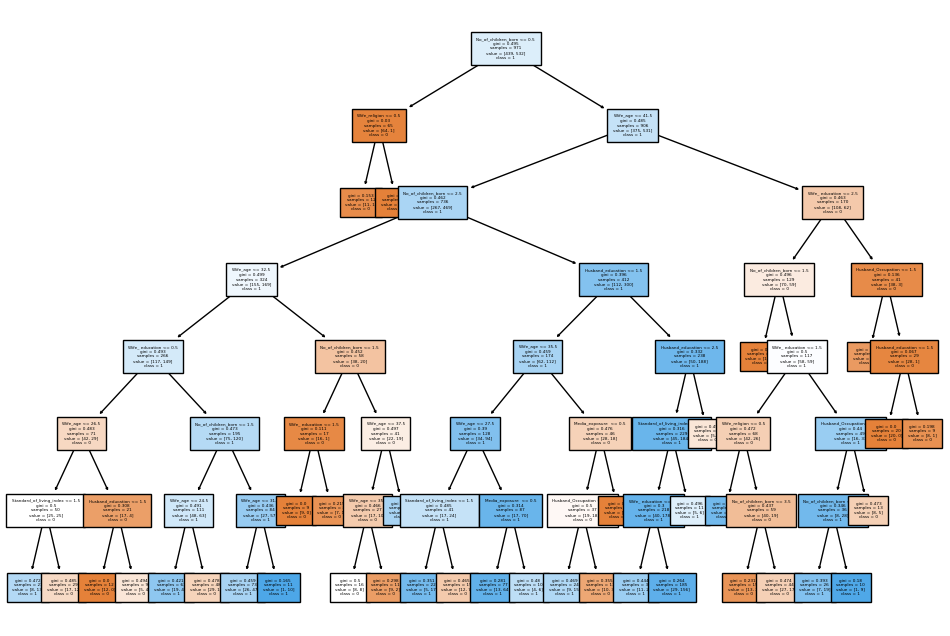

In [182]:
# Plot Decision Tree (if best model is Decision Tree)
if isinstance(best_model, DecisionTreeClassifier):
    plt.figure(figsize=(12, 8))
    plot_tree(best_model, filled=True, feature_names=X.columns, class_names=[str(x) for x in best_model.classes_], fontsize=3)
    
    # Save the Decision Tree plot to a local file (e.g., "decision_tree.png")
    plt.savefig("decision_tree_contra_methods.png", dpi=300)  # Adjust the file name and DPI as needed

# Print evaluation results
print(f'Best Model: {type(best_model).__name__}')
print("Test Data:")
print("Confusion Matrix:\n", test_cm)
print("Accuracy:", test_accuracy)
print(f"ROC AUC Score: {roc_auc_test:.2f}")
print("\nTrain Data:")
print("Confusion Matrix:\n", train_cm)
print("Accuracy:", train_accuracy)
print(f"ROC AUC Score: {roc_auc_train:.2f}")

# Print classification reports
print("\nTest Data Classification Report:\n", test_classification_report)
print("\nTrain Data Classification Report:\n", train_classification_report)

# Print feature importance (if available)
if feature_importance is not None:
    feature_importance_with_names = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
    print("\nFeature Importance:")
    for name, importance in feature_importance_with_names:
        print(f"{name}: {importance:.4f}")

# Print best hyperparameters
print("\nBest Hyperparameters:")
print(best_model.get_params())

plt.show()


In [192]:

from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('Predictive_Tree_File.dot','w')
dot_data = tree.export_graphviz(best_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(Xtrain), 
                                class_names = list(train_char_label))

ld_Tree_File.close()